<h1> Welcome to my Kernel.</h1>

<br>
English is not my first language, so sorry about any error. 

# Table of Contents:

**1. [Objective and Introduction](#Introduction)** <br>
**2. [Librarys](#Librarys)** <br>
**3. [First Look](#Known)** <br>
**4. [Explorations](#Explore)** <br>
**5. [Conclusions](#Conclusion)** <br>



<a id="Introduction"></a> <br> 
<h2>Objective</h2>
The objective of this analysis is to do some explorations to a better understand the patterns of Revenues and Expenditure in US Education.


<h1>Context</h1>

<h2>Public School Revenue Sources </h2><br>
(Last Updated: March 2017)
<i>Elementary and secondary public school revenues totaled $632 billion in school year 2013–14. Of this total, 9 percent of revenues were from federal sources, 46 percent were from state sources, and 45 percent were from local sources.</i><br>

In school year 2013 / 14, elementary and secondary public school revenues totaled 632 billion, in constant 2015–16 dollars.1 Of this total, 9 percent, or 55 billion, were from federal sources; 46 percent, or 292 billion, were from state sources; and 45 percent, or 284 billion, were from local sources. In 2013–14, the percentages from each source differed across the states and the District of Columbia. For example, the percentages of total revenues coming from federal, state, and local sources in Illinois were 8 percent, 26 percent, and 66 percent, respectively, while the same total revenues in Vermont were 6 percent, 90 percent, and 4 percent.   

Total elementary and secondary public school revenues were 7 percent higher in 2013–14 than in 2003–04 (632 billion versus 592 billion, in constant 2015–16 dollars). During this time, total revenues rose from 592 billion in 2003–04 to $658 billion in 2007–08 and then fell each year between 2008–09 and 2012–13. Total revenues then rose from 622 billion in 2012–13 to 632 billion in 2013–14. These changes were accompanied by a 3 percent increase in total elementary and secondary public school enrollment, from 49 million students in 2003–04 to 50 million students in 2013–14 (see indicator Elementary and Secondary Enrollment). <br>Font: [NCSE ](https://nces.ed.gov/programs/coe/indicator_cma.asp)

<a id="Librarys"></a> <br> 
<h1>Importing Librarys and data import</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Importing dataset
df_educ = pd.read_csv("../input/elsect_summary.csv")

<a id="Known"></a> <br> 
<h1>First look</h1>

In [3]:
#First look at the dataset
print(df_educ.shape)
print(df_educ.nunique())

(1224, 12)
STATE                             51
YEAR                              24
ENROLL                          1173
TOTAL_REVENUE                   1223
FEDERAL_REVENUE                 1224
STATE_REVENUE                   1201
LOCAL_REVENUE                   1224
TOTAL_EXPENDITURE               1224
INSTRUCTION_EXPENDITURE         1224
SUPPORT_SERVICES_EXPENDITURE    1224
OTHER_EXPENDITURE               1172
CAPITAL_OUTLAY_EXPENDITURE      1224
dtype: int64


In [4]:
# Looking Data types and nulls 
print(df_educ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 12 columns):
STATE                           1224 non-null object
YEAR                            1224 non-null int64
ENROLL                          1173 non-null float64
TOTAL_REVENUE                   1224 non-null int64
FEDERAL_REVENUE                 1224 non-null int64
STATE_REVENUE                   1224 non-null int64
LOCAL_REVENUE                   1224 non-null int64
TOTAL_EXPENDITURE               1224 non-null int64
INSTRUCTION_EXPENDITURE         1224 non-null int64
SUPPORT_SERVICES_EXPENDITURE    1224 non-null int64
OTHER_EXPENDITURE               1173 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1224 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 114.8+ KB
None


In [5]:
#How our data appears
df_educ.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


<h3>NOTE.1: THAT ALL 51 STATES HAVE TOTAL OF 24 ENTRIES (THAT IS THE NUMBER OF YEARS )</h3>
<h3>NOTE.2: THAT ALL 24 YEARS HAVE TOTAL OF 51 ENTRIES (THAT IS THE NUMBER OF STATES) </h3> 

<a id="Explore"></a> <br> 
<h1>Starting the Exploration</h1>

Knowing the density distribuition of the data

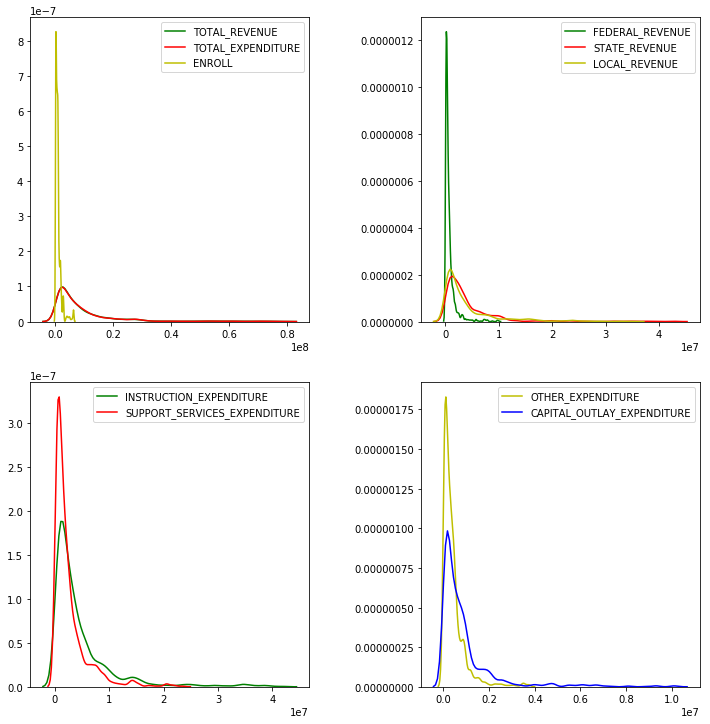

In [6]:
plt.figure(figsize = (12,12))
plt.subplot(221)
g1 = sns.kdeplot(df_educ['TOTAL_REVENUE'], color='g')
g1 = sns.kdeplot(df_educ['TOTAL_EXPENDITURE'],color='r')
g1 = sns.kdeplot(df_educ['ENROLL'].dropna(), color='y')

plt.subplot(222)
g2 = sns.kdeplot(df_educ['FEDERAL_REVENUE'], color='g')
g2 = sns.kdeplot(df_educ['STATE_REVENUE'],color='r')
g2 = sns.kdeplot(df_educ['LOCAL_REVENUE'],color='y')

plt.subplot(223)
g3 = sns.kdeplot(df_educ['INSTRUCTION_EXPENDITURE'].dropna(), color='g')
g3 = sns.kdeplot(df_educ['SUPPORT_SERVICES_EXPENDITURE'],color='r')

plt.subplot(224)
g4 = sns.kdeplot(df_educ['OTHER_EXPENDITURE'].dropna(),color='y')
g4 = sns.kdeplot(df_educ['CAPITAL_OUTLAY_EXPENDITURE'],color='b')


plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 0.9)
plt.show()

In [7]:
print('MIN TOTAL REVENUE')
print(df_educ["TOTAL_REVENUE"].min())
print('MEAN TOTAL REVENUE')
print(round(df_educ["TOTAL_REVENUE"].mean(),2))
print('MEDIAN TOTAL REVENUE')
print(df_educ["TOTAL_REVENUE"].median())
print('MAX TOTAL REVENUE')
print(df_educ["TOTAL_REVENUE"].max())
print('STD TOTAL REVENUE')
print(round(df_educ["TOTAL_REVENUE"].std(),2))


MIN TOTAL REVENUE
465650
MEAN TOTAL REVENUE
8924060.46
MEDIAN TOTAL REVENUE
5031386.5
MAX TOTAL REVENUE
78248042
STD TOTAL REVENUE
11460649.37


<h1>Creating a new variable of REVENUE - EXPENDITURE</h1>

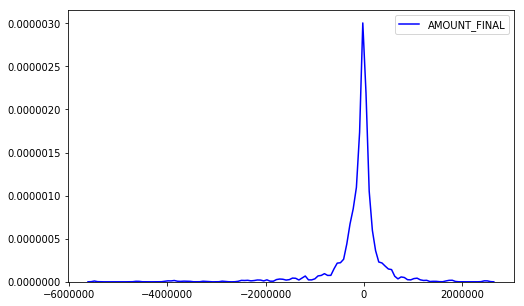

In [8]:
df_educ['AMOUNT_FINAL'] = df_educ["TOTAL_REVENUE"] - df_educ["TOTAL_EXPENDITURE"]

plt.figure(figsize = (8,5))
g = sns.kdeplot(df_educ['AMOUNT_FINAL'],color='b')
plt.show()

<h2>It's public administration, so it's make sense to difference is near zero.</h1>

<h1>Let's do some explorations through the States and Years</h1>

In [9]:
df_educ['REGION'] = np.nan

df_educ.loc[df_educ.STATE.isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                                'Rhode Island','Vermont','New Jersey', 'New York',
                                'Pennsylvania']), 'REGION'] = 'Northweast'

df_educ.loc[df_educ.STATE.isin(['Illinois', 'Indiana', 'Michigan', 'Ohio','Wisconsin','Iowa', 'Kansas', 
                                'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 
                                'South Dakota']), 'REGION'] = 'Midwest'

df_educ.loc[df_educ.STATE.isin(['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 
                                'South Carolina', 'Virginia','District of Columbia','West Virginia',
                                'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
                                'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']), 'REGION'] = 'South'

df_educ.loc[df_educ.STATE.isin(['Arizona','Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 
                                'Utah','Wyoming','Alaska', 'California', 'Hawaii', 'Oregon',
                                'Washington']), 'REGION'] = 'West'

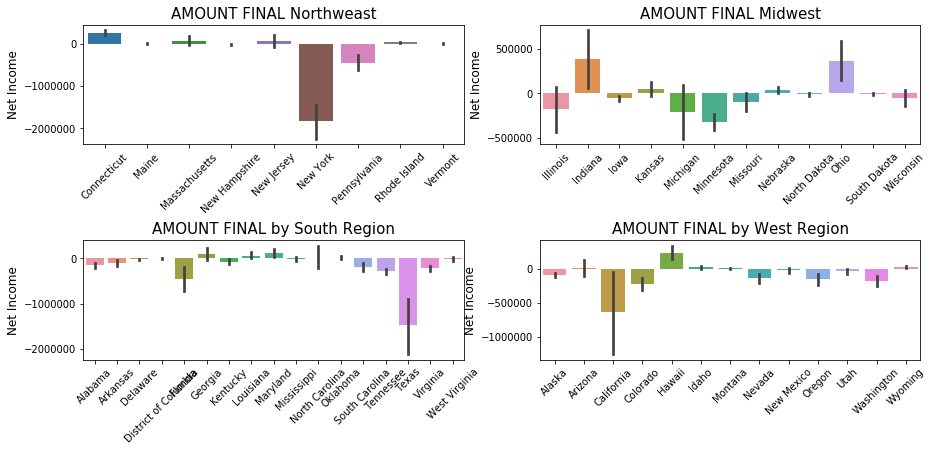

In [10]:
plt.figure(figsize = (15,6))

plt.subplot(2,2,1)
g = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=df_educ[df_educ['REGION'] == "Northweast"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("AMOUNT FINAL Northweast", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Net Income", fontsize=12)

plt.subplot(2,2,2)
g1 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=df_educ[df_educ['REGION'] == "Midwest"])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("AMOUNT FINAL Midwest", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Net Income", fontsize=12)

plt.subplot(2,2,3)
g2 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=df_educ[df_educ['REGION'] == "South"])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("AMOUNT FINAL by South Region", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Net Income", fontsize=12)

plt.subplot(2,2,4)
g3 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=df_educ[df_educ['REGION'] == "West"])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("AMOUNT FINAL by West Region", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Net Income", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)

plt.show()

<h2>Visual look by: </h2>
- TOTAL REVENUE
- TOTAL EXPENDITURE
- FINAL AMOUNT

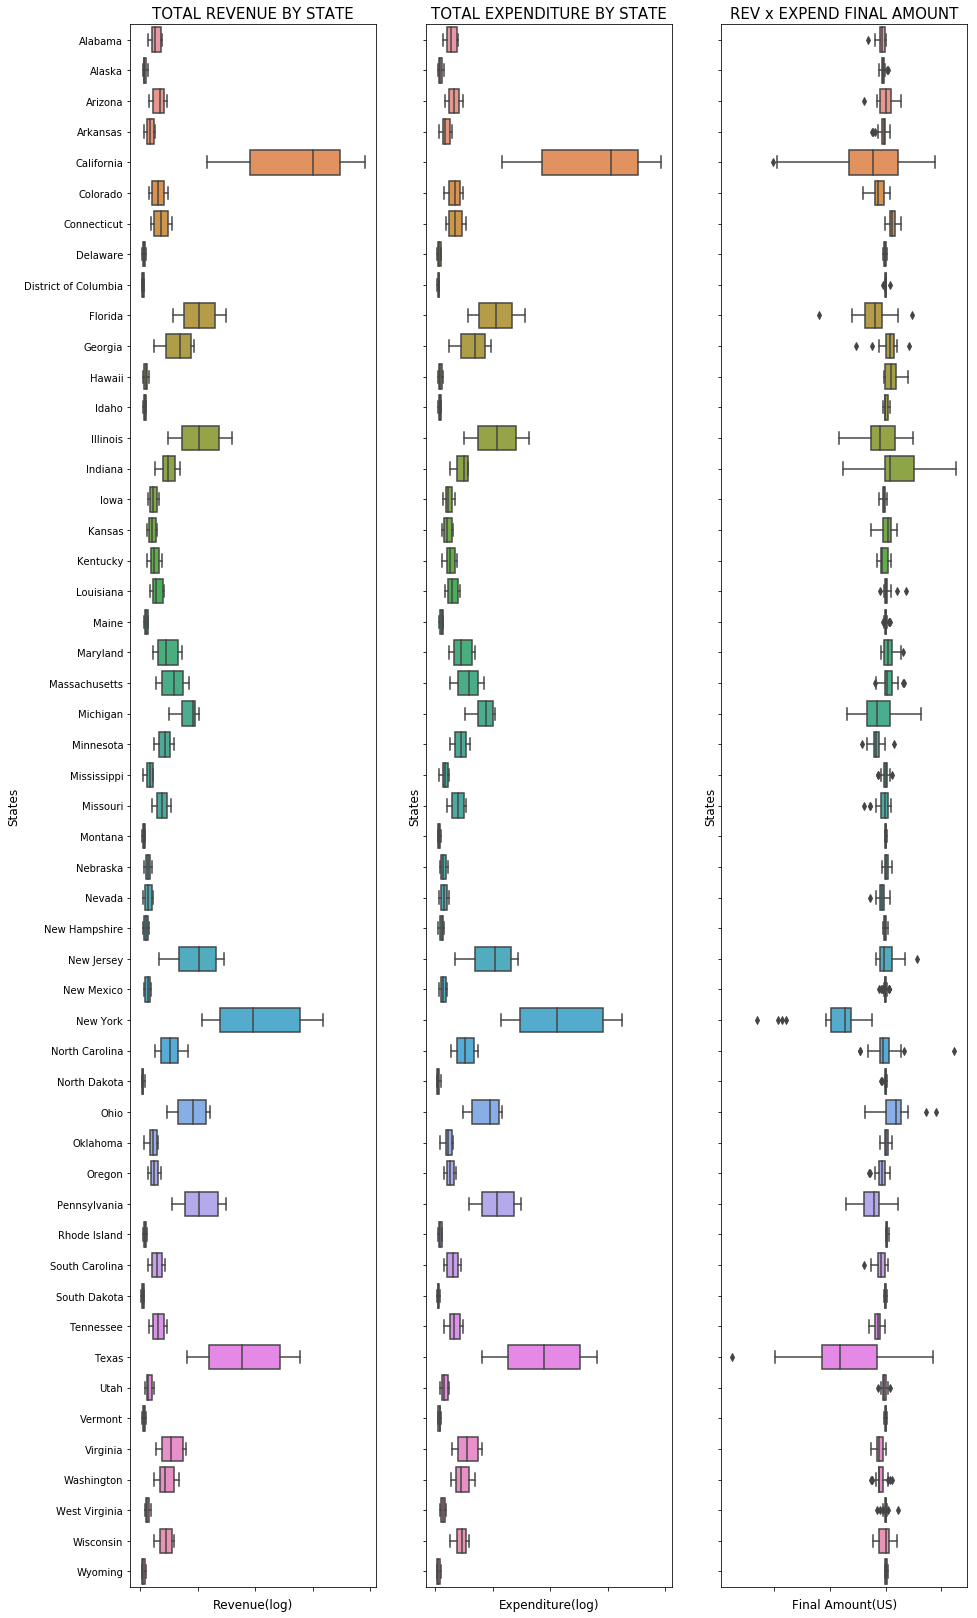

In [11]:
fig, ax = plt.subplots(1,3, sharex=False, sharey=True, 
                       figsize = (15,28))
ax = ax.flatten()

g = sns.boxplot(x="TOTAL_REVENUE",y="STATE", data=df_educ,ax=ax[0])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("TOTAL REVENUE BY STATE", fontsize=15)
g.set_xlabel("Revenue(log)", fontsize=12)
g.set_ylabel("States", fontsize=12)

g1 = sns.boxplot(x="TOTAL_EXPENDITURE",y="STATE", data=df_educ,ax=ax[1])
g1.set_xticklabels(g.get_xticklabels(),rotation=90)
g1.set_title("TOTAL EXPENDITURE BY STATE", fontsize=15)
g1.set_xlabel("Expenditure(log)", fontsize=12)
g1.set_ylabel("States", fontsize=12)

g2 = sns.boxplot(x="AMOUNT_FINAL",y="STATE",data=df_educ,ax=ax[2])
g2.set_xticklabels(g.get_xticklabels(),rotation=90)
g2.set_title("REV x EXPEND FINAL AMOUNT", fontsize=15)
g2.set_xlabel("Final Amount(US)", fontsize=12)
g2.set_ylabel("States", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)

plt.show()

In [12]:
state_amount_final = df_educ.groupby("STATE")['AMOUNT_FINAL'].mean()
print("Total of States with positive final Result")
print((state_amount_final > 0).sum())

Total of States with positive final Result
21


It's very interesting to see that many States have high negative final amounts.<br>
- Why california, New York and Texas have so negative values?
- Why Indiana have highest positive final amount them anothers?

<h2>Knowning the FINAL AMOUNT by YEAR

Positive final results since 92
3


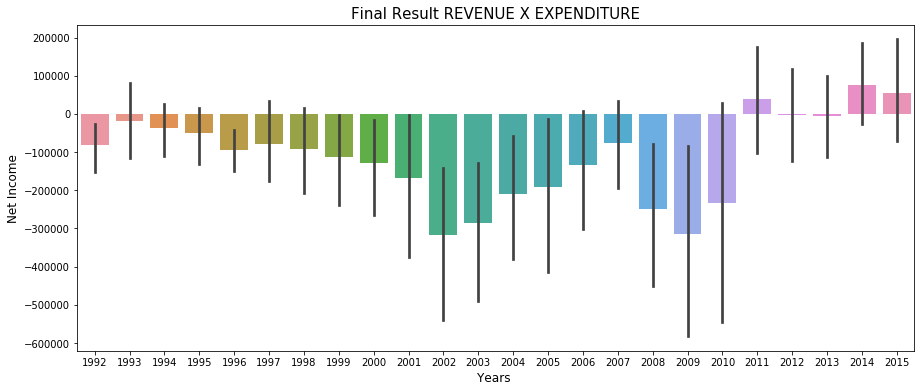

In [13]:
year_amount_final = df_educ.groupby("YEAR")['AMOUNT_FINAL'].mean()

print("Positive final results since 92")
print((year_amount_final > 0).sum())

plt.figure(figsize = (15,6))
g = sns.barplot(x="YEAR", y="AMOUNT_FINAL",data=df_educ)
g.set_title("Final Result REVENUE X EXPENDITURE", fontsize=15)
g.set_xlabel("Years ", fontsize=12)
g.set_ylabel("Net Income", fontsize=12)

plt.show()

<h1>Let's add one column with the respective the President by Period </h1>

In [14]:
df_educ["President"] = np.nan

df_educ.loc[df_educ["YEAR"] <= 2000,"President"] = 'Bill Clinton'
df_educ.loc[(df_educ["YEAR"] > 2000) & (df_educ["YEAR"] <= 2009),"President"] = 'George Bush'
df_educ.loc[(df_educ["YEAR"] > 2009),"President"] = 'Barack Obama'

print(df_educ['President'].value_counts())

George Bush     459
Bill Clinton    459
Barack Obama    306
Name: President, dtype: int64


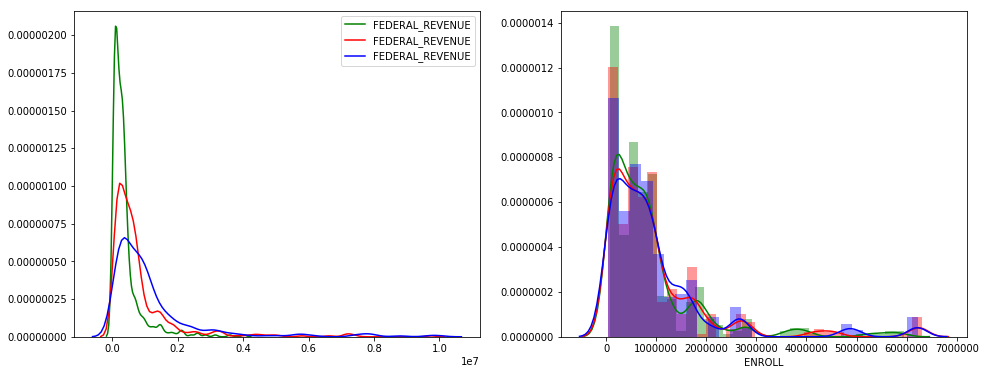

In [15]:
Bill = df_educ[df_educ["President"] == "Bill Clinton"]
Bush = df_educ[df_educ["President"] == "George Bush"]
Obama = df_educ[df_educ["President"] == "Barack Obama"]

plt.figure(figsize = (16,6))
plt.subplot(121)
g1 = sns.kdeplot(Bill['FEDERAL_REVENUE'], color='g')
g1 = sns.kdeplot(Bush['FEDERAL_REVENUE'], color='r')
g1 = sns.kdeplot(Obama['FEDERAL_REVENUE'], color='b')

plt.subplot(122)
g1 = sns.distplot(Bill['ENROLL'].dropna(), color='g')
g1 = sns.distplot(Bush['ENROLL'].dropna(), color='r')
g1 = sns.distplot(Obama['ENROLL'].dropna(), color='b')

plt.show()

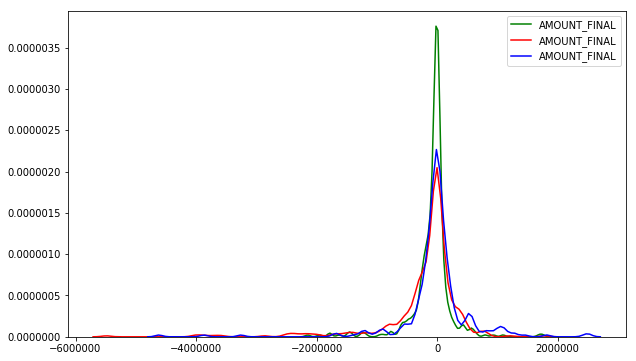

In [16]:
plt.figure(figsize = (10,6))
g = sns.kdeplot(Bill['AMOUNT_FINAL'], color='g')
g = sns.kdeplot(Bush['AMOUNT_FINAL'], color='r')
g = sns.kdeplot(Obama['AMOUNT_FINAL'], color='b')

Curious result. Clinton Government have better results than Bush and Obama

Exploring the States ENROLLS and AMOUNT_FINAL separeted by President's period

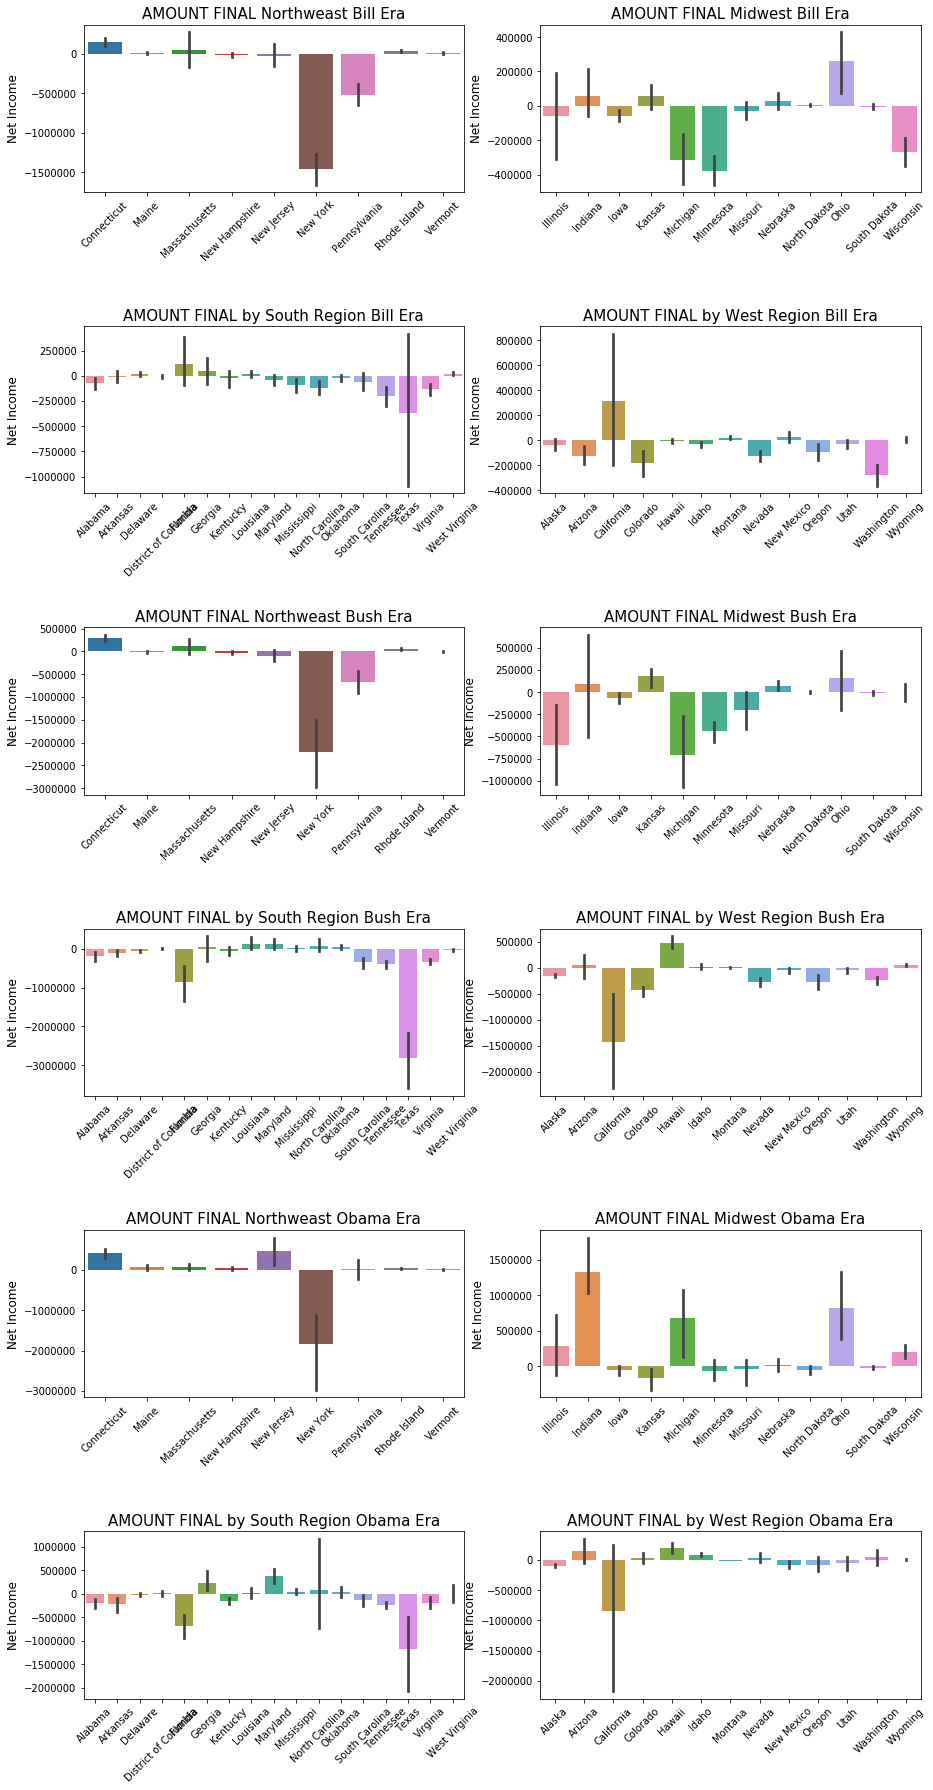

In [17]:
plt.figure(figsize = (15,30))

plt.subplot(6,2,1)
g = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bill[Bill['REGION'] == "Northweast"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("AMOUNT FINAL Northweast Bill Era", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,2)
g1 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bill[Bill['REGION'] == "Midwest"])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("AMOUNT FINAL Midwest Bill Era", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,3)
g2 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bill[Bill['REGION'] == "South"])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("AMOUNT FINAL by South Region Bill Era", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,4)
g3 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bill[Bill['REGION'] == "West"])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("AMOUNT FINAL by West Region Bill Era", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,5)
g = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bush[Bush['REGION'] == "Northweast"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("AMOUNT FINAL Northweast Bush Era", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,6)
g1 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bush[Bush['REGION'] == "Midwest"])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("AMOUNT FINAL Midwest Bush Era", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,7)
g2 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bush[Bush['REGION'] == "South"])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("AMOUNT FINAL by South Region Bush Era", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,8)
g3 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Bush[Bush['REGION'] == "West"])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("AMOUNT FINAL by West Region Bush Era", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,9)
g = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Obama[Obama['REGION'] == "Northweast"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("AMOUNT FINAL Northweast Obama Era", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,10)
g1 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Obama[Obama['REGION'] == "Midwest"])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("AMOUNT FINAL Midwest Obama Era", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,11)
g2 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Obama[Obama['REGION'] == "South"])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("AMOUNT FINAL by South Region Obama Era", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Net Income", fontsize=12)

plt.subplot(6,2,12)
g3 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=Obama[Obama['REGION'] == "West"])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("AMOUNT FINAL by West Region Obama Era", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Net Income", fontsize=12)


plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)

plt.show()

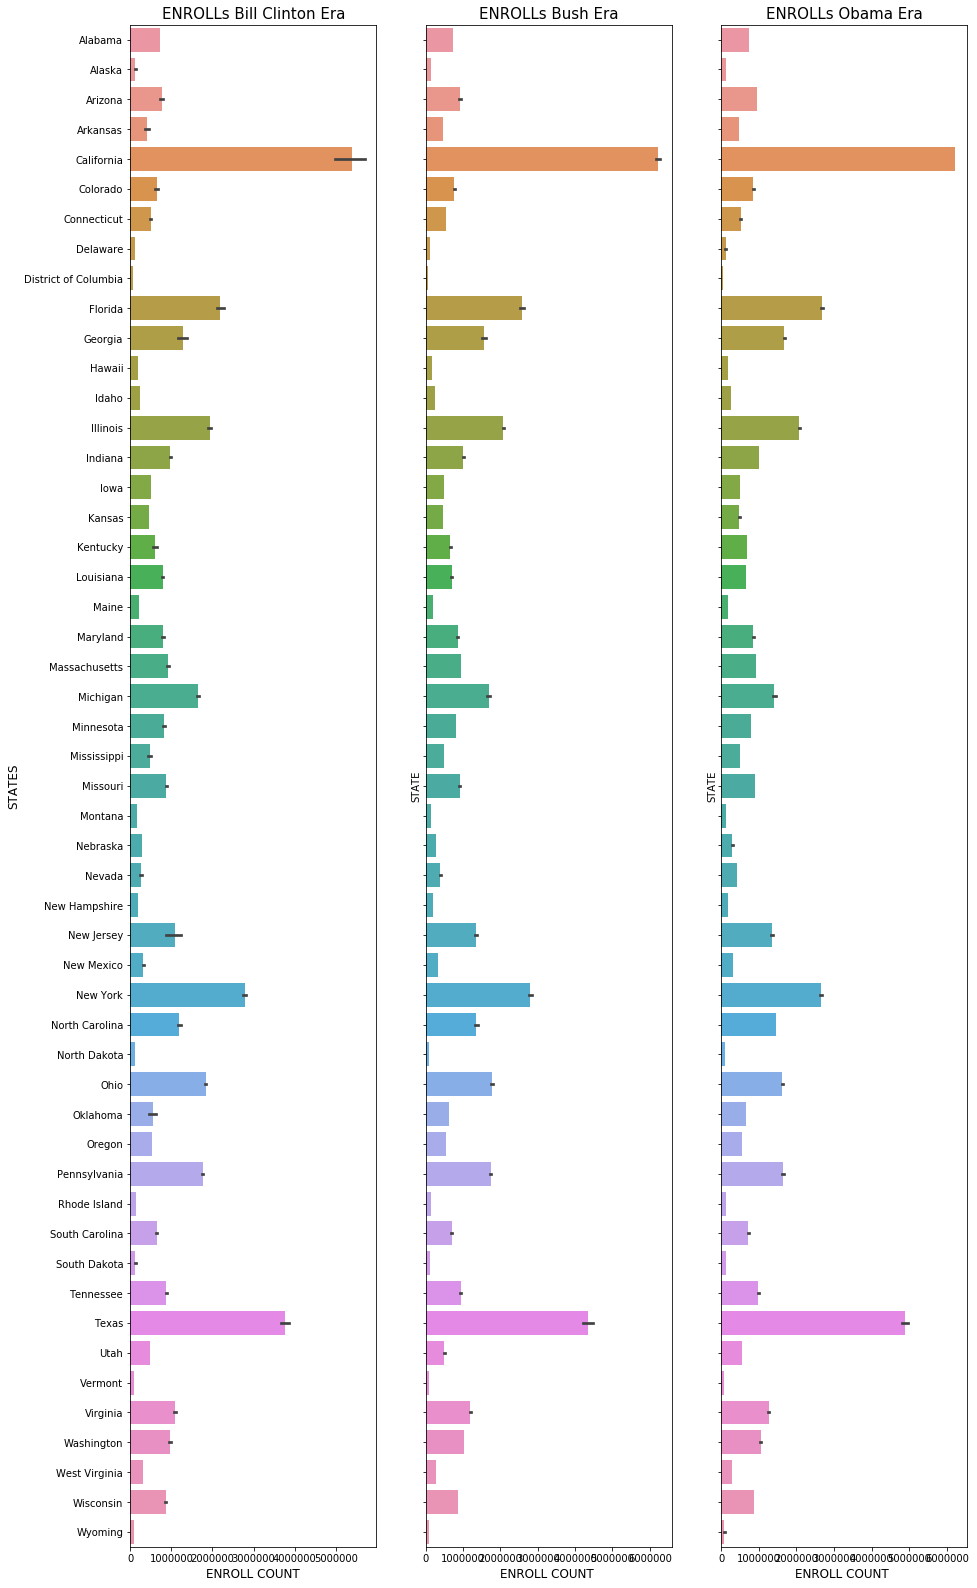

In [18]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=True, 
                       squeeze=False, figsize = (15,28))
ax = ax.flatten()

g = sns.barplot(x="ENROLL",y="STATE", data=Bill,ax=ax[0])
g.set_title("ENROLLs Bill Clinton Era", fontsize=15)
g.set_xlabel("ENROLL COUNT", fontsize=12)
g.set_ylabel("STATES", fontsize=12)

g1 = sns.barplot(x="ENROLL",y="STATE", data=Bush,ax=ax[1])
g1.set_title("ENROLLs Bush Era", fontsize=15)
g1.set_xlabel("ENROLL COUNT ", fontsize=12)


g2 = sns.barplot(x="ENROLL",y="STATE", data=Obama,ax=ax[2])
g2.set_title("ENROLLs Obama Era", fontsize=15)
g2.set_xlabel("ENROLL COUNT ", fontsize=12)


plt.show()

<h1>Creating a new Feature that is the division by TOTAL REVENUE and ENROLL number</h1>

In [19]:
df_educ['revenue_per_student'] = df_educ['TOTAL_REVENUE'] / len(df_educ['ENROLL'])
df_educ['expend_per_student'] = df_educ['TOTAL_EXPENDITURE'] /  len(df_educ['ENROLL'])

Bill = df_educ[df_educ["President"] == "Bill Clinton"]
Bush = df_educ[df_educ["President"] == "George Bush"]
Obama = df_educ[df_educ["President"] == "Barack Obama"]


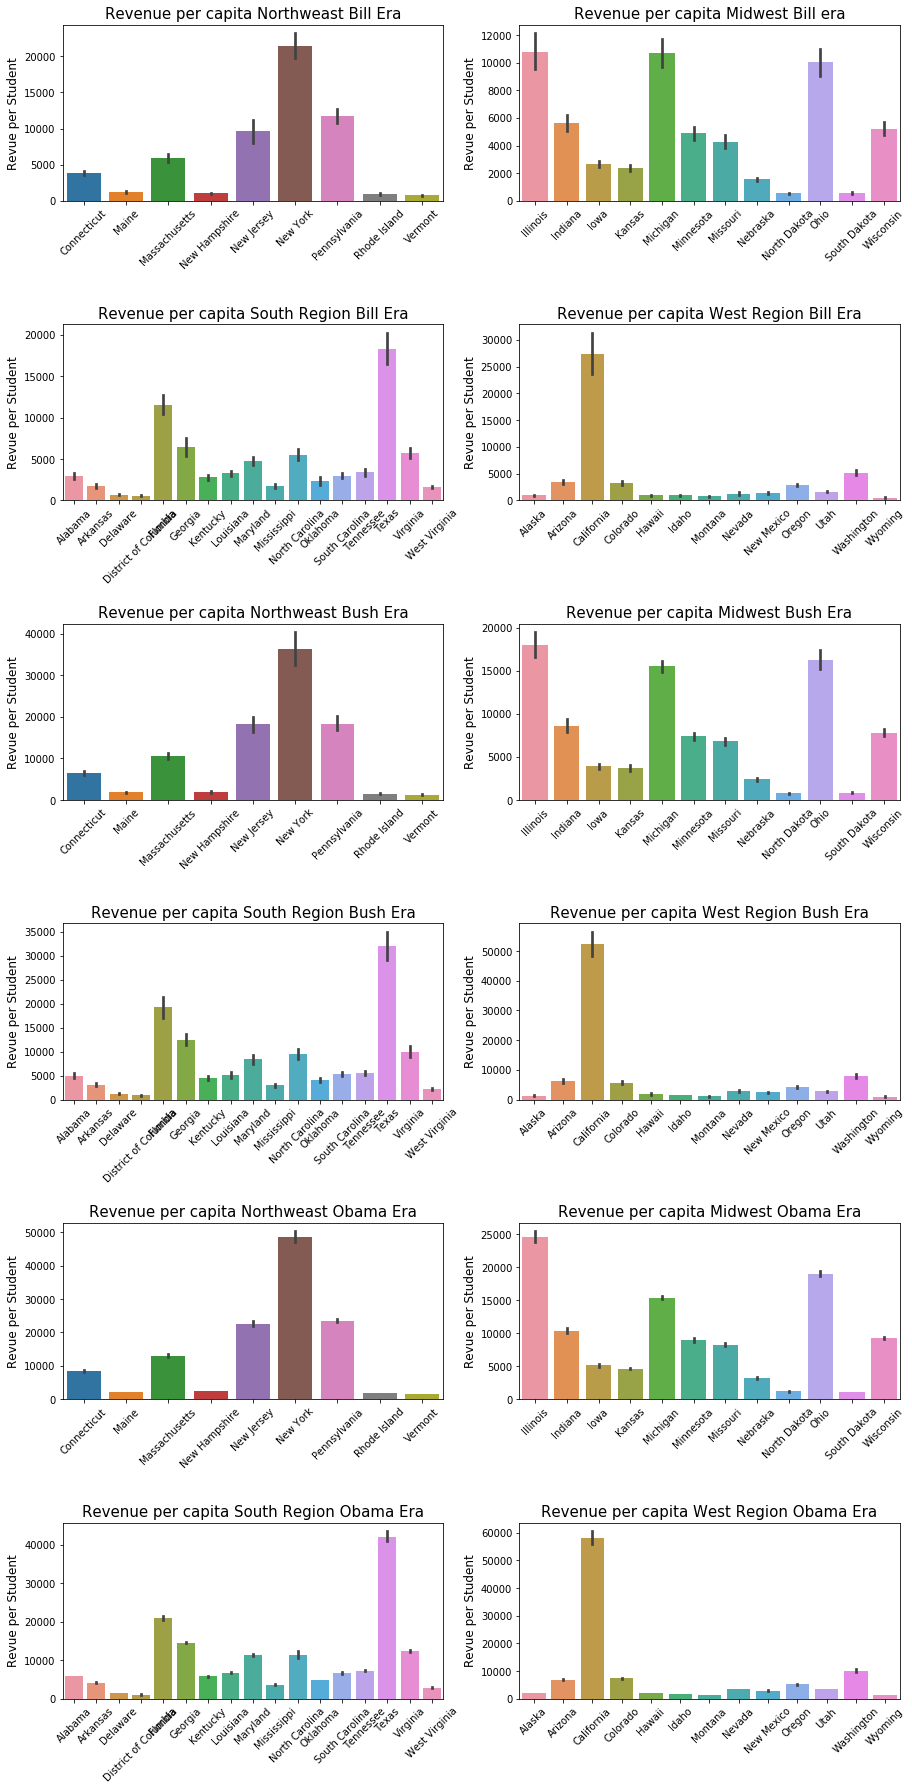

In [20]:
plt.figure(figsize = (15,30))

plt.subplot(6,2,1)
g = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bill[Bill['REGION'] == "Northweast"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Revenue per capita Northweast Bill Era", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,2)
g1 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bill[Bill['REGION'] == "Midwest"])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Revenue per capita Midwest Bill era", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,3)
g2 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bill[Bill['REGION'] == "South"])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Revenue per capita South Region Bill Era", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,4)
g3 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bill[Bill['REGION'] == "West"])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("Revenue per capita West Region Bill Era", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,5)
g = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bush[Bush['REGION'] == "Northweast"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Revenue per capita Northweast Bush Era", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,6)
g1 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bush[Bush['REGION'] == "Midwest"])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Revenue per capita Midwest Bush Era", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,7)
g2 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bush[Bush['REGION'] == "South"])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Revenue per capita South Region Bush Era", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,8)
g3 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Bush[Bush['REGION'] == "West"])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("Revenue per capita West Region Bush Era", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,9)
g = sns.barplot(x="STATE", y="revenue_per_student",
                data=Obama[Obama['REGION'] == "Northweast"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Revenue per capita Northweast Obama Era", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,10)
g1 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Obama[Obama['REGION'] == "Midwest"])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Revenue per capita Midwest Obama Era", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,11)
g2 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Obama[Obama['REGION'] == "South"])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Revenue per capita South Region Obama Era", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Revue per Student", fontsize=12)

plt.subplot(6,2,12)
g3 = sns.barplot(x="STATE", y="revenue_per_student",
                data=Obama[Obama['REGION'] == "West"])
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
g3.set_title("Revenue per capita West Region Obama Era", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Revue per Student", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

Looking the revenue per student by different governments

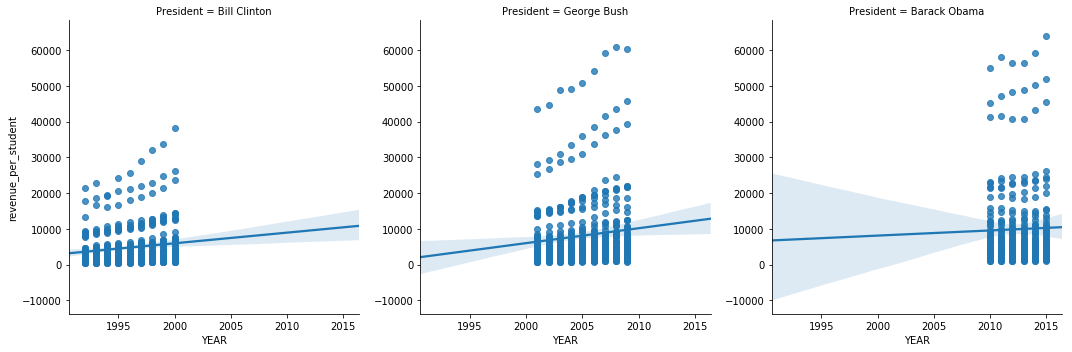

In [21]:
plt.figure(figsize =( 22,15))

g = sns.lmplot(x="YEAR",y='revenue_per_student', 
           data=df_educ, col="President",sharey=True)
plt.show()

<a id="Conclusion"></a> <br> 
<h1>Conclusions</h1>
    
 California, New York and Texas have the highest amounts to education.
  
We can see a lot of interesting values... Why some states have positive final amounts and almost all have negative values?

We can see differences in investments by president... Why this differences? Maybe it's because Democracts x Republicans States? Better adminstrations? 

The Enrolls is almost constant .



<i>**I will continue this conclusion and some Analysis. It is a first look on this. </i>